# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [170]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as stats
from scipy.stats import linregress
from scipy.spatial import KDTree

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = list(zip(lats, lngs))

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# combine cities and lattitudes and longitudes to one list to be easily
# converted as dataframe and easily call latitude and longitude for url
city_lat_long = list(zip(cities,lat_lngs))

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 554


---

In [10]:
# generate the url to call the openweather API
#url = "https://api.openweathermap.org/data/3.0/onecall?lat="
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    
    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=imperial"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dudinka
Processing Record 2 of Set 1 | beaufort west
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | atherton
Processing Record 5 of Set 1 | blackmans bay
Processing Record 6 of Set 1 | udachny
Processing Record 7 of Set 1 | culpeper
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | olonkinbyen
Processing Record 10 of Set 1 | luderitz
Processing Record 11 of Set 1 | adamstown
Processing Record 12 of Set 1 | port mathurin
Processing Record 13 of Set 1 | xilin hot
Processing Record 14 of Set 1 | hermanus
Processing Record 15 of Set 1 | waitangi
Processing Record 16 of Set 1 | grytviken
Processing Record 17 of Set 1 | angaur state
Processing Record 18 of Set 1 | edinburgh of the seven seas
Processing Record 19 of Set 1 | thompson
Processing Record 20 of Set 1 | margaret river
Processing Record 21 of Set 1 | college
Processing Record 22 of Set 1 | usogor

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [13]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          532
Lat           532
Lng           532
Max Temp      532
Humidity      532
Cloudiness    532
Wind Speed    532
Country       532
Date          532
dtype: int64

In [15]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,dudinka,69.4058,86.1778,18.86,88,100,9.57,RU,1729452882
1,beaufort west,-32.3567,22.5830,52.27,74,71,15.90,ZA,1729452883
2,ushuaia,-54.8000,-68.3000,53.26,37,0,10.36,AR,1729452884
3,atherton,53.5237,-2.4935,58.28,64,55,8.99,GB,1729452885
4,blackmans bay,-43.0167,147.3167,52.74,93,71,4.14,AU,1729452886


In [17]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [19]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dudinka,69.4058,86.1778,18.86,88,100,9.57,RU,1729452882
1,beaufort west,-32.3567,22.5830,52.27,74,71,15.90,ZA,1729452883
2,ushuaia,-54.8000,-68.3000,53.26,37,0,10.36,AR,1729452884
3,atherton,53.5237,-2.4935,58.28,64,55,8.99,GB,1729452885
4,blackmans bay,-43.0167,147.3167,52.74,93,71,4.14,AU,1729452886


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

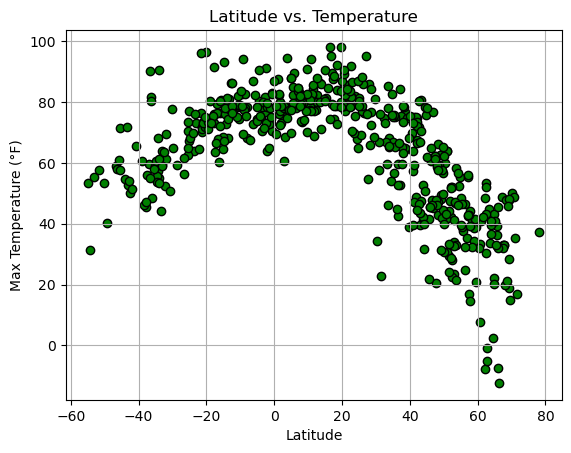

In [57]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df['Lat'],
    city_data_df['Max Temp'],
    c='green',
    edgecolors='black',
)

# Incorporate the other graph properties
# change the label of the axes so it is readable and not abbreviated
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°F)')
plt.title('Latitude vs. Temperature')
plt.grid(True) 

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

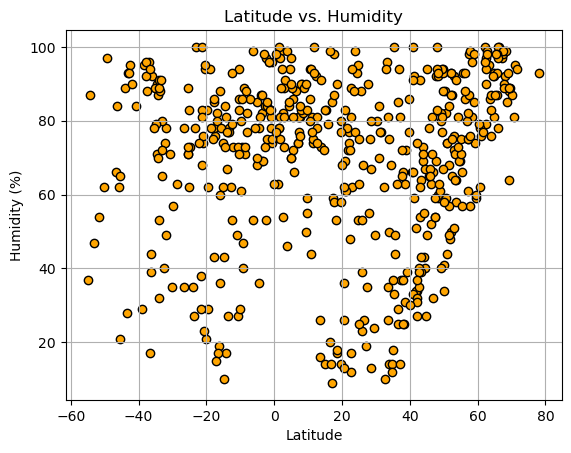

In [176]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(
    city_data_df['Lat'],
    city_data_df['Humidity'],
    c='orange',
    edgecolors='black',
)

# Incorporate the other graph properties
# change the label of the axes so it is readable and not abbreviated
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Latitude vs. Humidity')
plt.grid(True) 

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

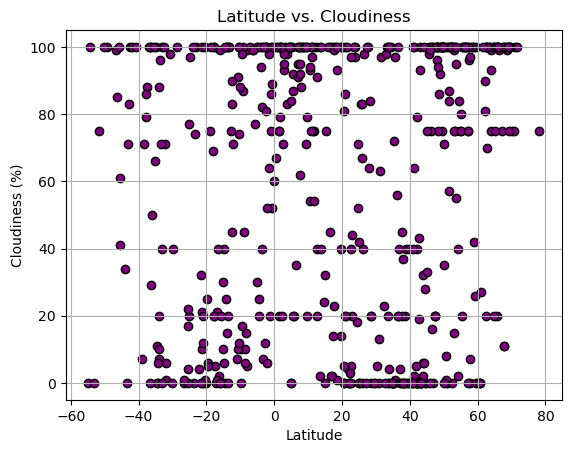

In [63]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(
    city_data_df['Lat'],
    city_data_df['Cloudiness'],
    c='purple',
    edgecolors='black',
)

# Incorporate the other graph properties
# change the label of the axes so it is readable and not abbreviated
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Latitude vs. Cloudiness')
plt.grid(True) 

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

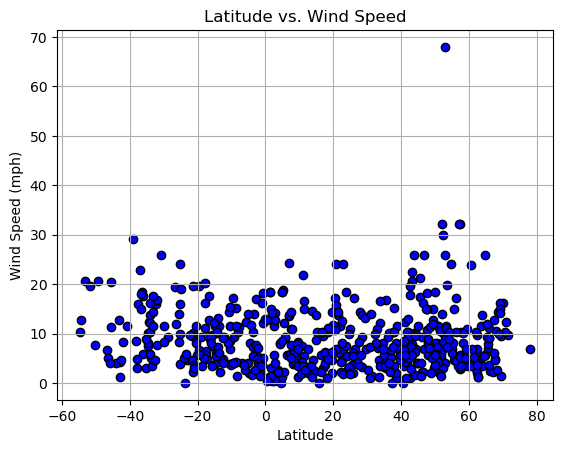

In [66]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(
    city_data_df['Lat'],
    city_data_df['Wind Speed'],
    c='blue',
    edgecolors='black',
)

# Incorporate the other graph properties
# change the label of the axes so it is readable and not abbreviated
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Latitude vs. Wind Speed')
plt.grid(True) 

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [161]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    stdev = np.std(y_values)
    sem = stats.sem(y_values)
    # print linear regression calculations and slope formula to confirm accuracy
    print(
        f'\n'
        f'The slope of the regression is: {slope}.\n' 
        f'The inercept of the regression is: {intercept}.\n' 
        f'The rvalue of the regression is: {rvalue}.\n' 
        f'The pvalue of the regression is: {pvalue}.\n' 
        f'The Standard Deviation is: {stdev}.\n' 
        f'The Standard Error is: {stderr}.\n'
        f'The Standard Error of the mean is: {sem}.\n'
        f'The regression line equation is: {line_eq}.\n'
    )
    return regress_values, line_eq


In [163]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,dudinka,69.4058,86.1778,18.86,88,100,9.57,RU,1729452882
3,atherton,53.5237,-2.4935,58.28,64,55,8.99,GB,1729452885
5,udachny,66.4167,112.4000,-12.33,100,99,2.51,RU,1729452888
6,culpeper,38.5004,-77.9664,76.71,31,0,1.01,US,1729452889
8,olonkinbyen,70.9221,-8.7187,35.19,95,100,12.28,SJ,1729452891


In [165]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) <= 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,beaufort west,-32.3567,22.5830,52.27,74,71,15.90,ZA,1729452883
2,ushuaia,-54.8000,-68.3000,53.26,37,0,10.36,AR,1729452884
4,blackmans bay,-43.0167,147.3167,52.74,93,71,4.14,AU,1729452886
7,punta arenas,-53.1500,-70.9167,55.51,47,0,20.71,CL,1729452683
9,luderitz,-26.6481,15.1594,56.35,78,0,19.46,NaN,1729452892


###  Temperature vs. Latitude Linear Regression Plot


The slope of the regression is: -0.8724551675220137.
The inercept of the regression is: 92.38909022344961.
The rvalue of the regression is: -0.8002142144595278.
The pvalue of the regression is: 1.0051841572210213e-81.
The Standard Deviation is: 22.011413511586394.
The Standard Error is: 0.0345091307079842.
The Standard Error of the mean is: 1.1601033536069678.
The regression line equation is: y = -0.87x + 92.39.



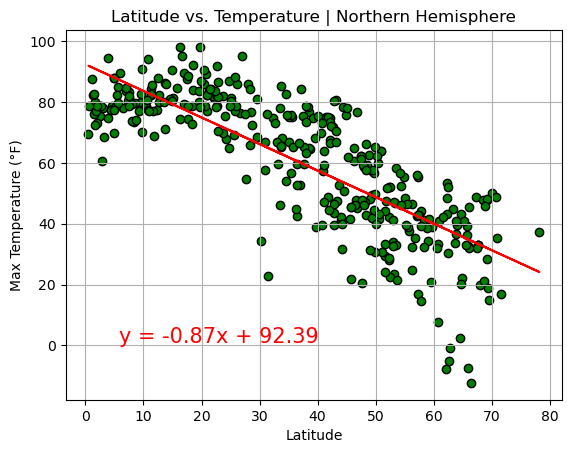

In [172]:
# Linear regression on Northern Hemisphere of Temp vs. Latitude
# using the previously define linear regression function
regress_values, line_eq = linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])

# create scatter plot with this data
plt.scatter(
    northern_hemi_df['Lat'],
    northern_hemi_df['Max Temp'],
    c='green',
    edgecolors='black',
)

# Incorporate the other graph properties
# change the label of the axes so it is readable and not abbreviated
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°F)')
plt.title('Latitude vs. Temperature | Northern Hemisphere')
plt.plot(northern_hemi_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.grid(True) 

# Save the figure
plt.savefig("output_data/Fig5.png")

# Show plot
plt.show()


The slope of the regression is: 0.5671626531077727.
The inercept of the regression is: 82.31778105331617.
The rvalue of the regression is: 0.6859357328428907.
The pvalue of the regression is: 4.1151818426515423e-25.
The Standard Deviation is: 11.597997399334803.
The Standard Error is: 0.0462818400412109.
The Standard Error of the mean is: 0.8895257946032651.
The regression line equation is: y = 0.57x + 82.32.



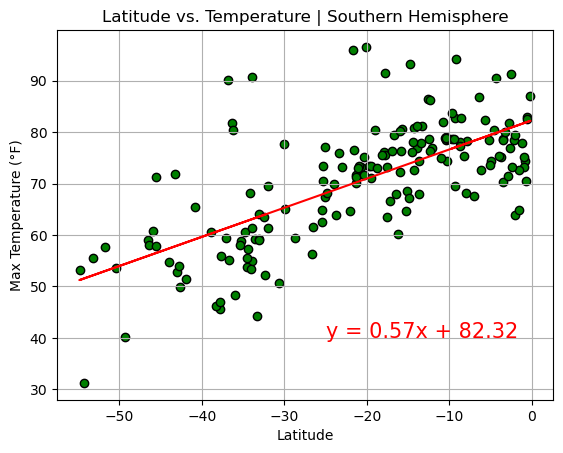

In [174]:
# Linear regression on Southern Hemisphere
# using the previously define linear regression function
regress_values, line_eq = linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])

# create scatter plot with this data
plt.scatter(
    southern_hemi_df['Lat'],
    southern_hemi_df['Max Temp'],
    c='green',
    edgecolors='black',
)

# Incorporate the other graph properties
# change the label of the axes so it is readable and not abbreviated
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°F)')
plt.title('Latitude vs. Temperature | Southern Hemisphere')
plt.plot(southern_hemi_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-25,40),fontsize=15,color="red")
plt.grid(True) 

# Save the figure
plt.savefig("output_data/Fig6.png")

# Show plot
plt.show()

# Discussion about the linear relationship of Latitude vs. Temperature
### Northern Hemisphere
> - There is a negative correlation (indicated with a slope of -0.87) meaning that as the latitude decreases (moving closer to the North pole) the temperature decreases
> - The equation of y=−0.87x+92.39 indicates that with each decrease in latitude by 1 degree, the temperature goes down by 0.87 degrees.  And, 92.39 indcates the estimated temperature at 0 latitude (the equator) based on these trends.
> - The r-value of -0.80 signifies that the negative correlation is significant but not perfect.  This means that while a higher latitude does have a strong correlation to decreasing temperature, there are enough outliers to signify that there is still an influence of other factors in this relationship

### Southern Hemisphere
> - There is a positive correlation (indicated with a slope of 0.14) meaning that as the latitude increases (moving closer to the equator) the temperature increases
> - The equation of y=−0.57x+87.32 indicates that with each increase in latitude by 1 degree, the temperature goes up by 0.57 degrees.  And, 82.32 indcates the estimated temperature at 0 latitude (the equator) based on these trends.
> - The r-value of -0.68 signifies that the positive correlation is relatively weak.   This means that the positive correlation between temperature and latitude in the Southern Hemisphere is weaker than the Northern Hemisphere and other factors play a larger role in this comparison

### Humidity vs. Latitude Linear Regression Plot


The slope of the regression is: 0.14519806941445487.
The inercept of the regression is: 64.26033324202997.
The rvalue of the regression is: 0.12474575627669114.
The pvalue of the regression is: 0.0177295411727461.
The Standard Deviation is: 23.498824436273793.
The Standard Error is: 0.060951181917198054.
The Standard Error of the mean is: 1.2384967925841233.
The regression line equation is: y = 0.15x + 64.26.



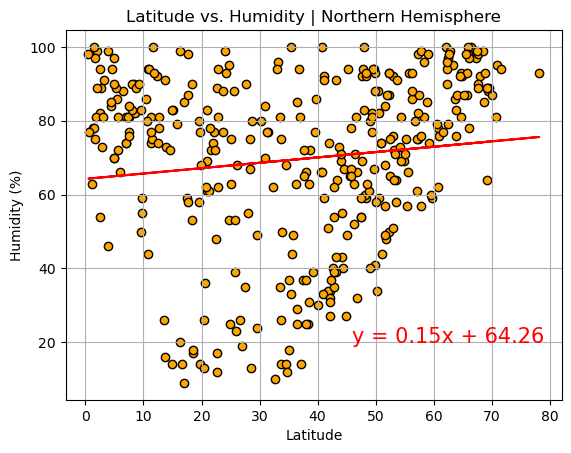

In [244]:
# Northern Hemisphere Humidity vs. Latitude Regression Plot
# using the previously define linear regression function
regress_values, line_eq = linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])

# create scatter plot with this data
plt.scatter(
    northern_hemi_df['Lat'],
    northern_hemi_df['Humidity'],
    c='orange',
    edgecolors='black',
)

# Incorporate the other graph properties
# change the label of the axes so it is readable and not abbreviated
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Latitude vs. Humidity | Northern Hemisphere')
plt.plot(northern_hemi_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(46,20),fontsize=15,color="red")
plt.grid(True) 

# Save the figure
plt.savefig("output_data/Fig7.png")

# Show plot
plt.show()


The slope of the regression is: 0.1225412574541228.
The inercept of the regression is: 72.19554842270726.
The rvalue of the regression is: 0.07727646207446989.
The pvalue of the regression is: 0.315083625004406.
The Standard Deviation is: 22.243028117883274.
The Standard Error is: 0.1216161174413831.
The Standard Error of the mean is: 1.7059623812364095.
The regression line equation is: y = 0.12x + 72.2.



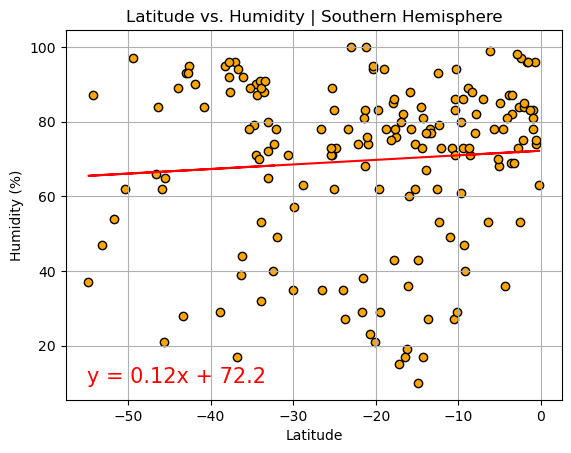

In [246]:
# Southern Hemisphere
# using the previously define linear regression function
regress_values, line_eq = linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])

# create scatter plot with this data
plt.scatter(
    southern_hemi_df['Lat'],
    southern_hemi_df['Humidity'],
    c='orange',
    edgecolors='black',
)

# Incorporate the other graph properties
# change the label of the axes so it is readable and not abbreviated
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Latitude vs. Humidity | Southern Hemisphere')
plt.plot(southern_hemi_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-55,10),fontsize=15,color="red")
plt.grid(True) 

# Save the figure
plt.savefig("output_data/Fig8.png")

# Show plot
plt.show()

# Discussion about the linear relationship of Latitude vs. Humidity

### Northern Hemisphere
> - There is a positive correlation (indicated with a slope of 0.15) meaning that as the latitude increases (moving closer to the North pole) the humidity increases ever so slightly
> - The equation of y=−0.15x+64.26 indicates that with each decrease in latitude by 1 degree, the humidity goes up by 0.12 percent.  And, 64.26 indcates the estimated humidity percentage at 0 latitude (the equator) based on these trends.
> - The r-value of 0.12 signifies that the positive correlation is almost non-existant.  This means that increasing latitude hardly affects the humidity percentage at all.  

### Southern Hemisphere
> - There is a positive correlation (indicated with a slope of 0.12) meaning that as the latitude increases (moving closer to the equator) the humidity increases
> - The equation of y=0.12x+72.2 indicates that with each increase in latitude by 1 degree, the humidity goes up by 0.12 percent.  And, 72.2 indcates the estimated humidity percentage at 0 latitude (the equator) based on these trends.
> - The r-value of 0.07 signifies that the positive correlation is extremely weak.   This means that the positive correlation between humidity and latitude in the Southern Hemisphere is even weaker than the already-weak Northern Hemisphere and other factors play an almost total role in this relationship

### Cloudiness vs. Latitude Linear Regression Plot


The slope of the regression is: 0.08946736309393374.
The inercept of the regression is: 57.18605254531928.
The rvalue of the regression is: 0.0436681947824123.
The pvalue of the regression is: 0.408116417745621.
The Standard Deviation is: 41.36285176084395.
The Standard Error is: 0.108028338968021.
The Standard Error of the mean is: 2.180013701402885.
The regression line equation is: y = 0.09x + 57.19.



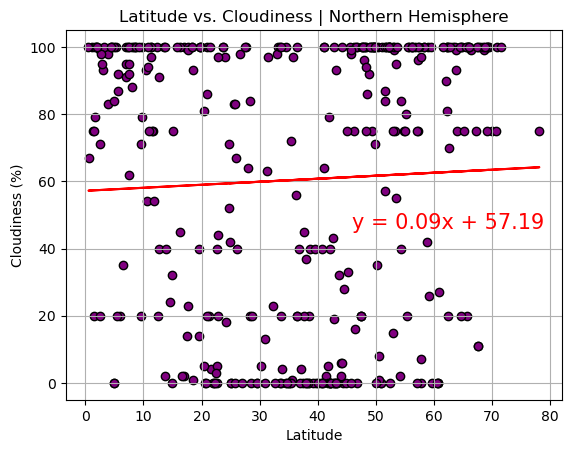

In [212]:
# Northern Hemisphere 
# using the previously define linear regression function
regress_values, line_eq = linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])

# create scatter plot with this data
plt.scatter(
    northern_hemi_df['Lat'],
    northern_hemi_df['Cloudiness'],
    c='purple',
    edgecolors='black',
)

# Incorporate the other graph properties
# change the label of the axes so it is readable and not abbreviated
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Latitude vs. Cloudiness | Northern Hemisphere')
plt.plot(northern_hemi_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(46,46),fontsize=15,color="red")
plt.grid(True) 

# Save the figure
plt.savefig("output_data/Fig9.png")

# Show plot
plt.show()


The slope of the regression is: 0.08598656586243157.
The inercept of the regression is: 54.19206691632138.
The rvalue of the regression is: 0.02964439441359931.
The pvalue of the regression is: 0.7003173658333671.
The Standard Deviation is: 40.68617198526139.
The Standard Error is: 0.22302510808288778.
The Standard Error of the mean is: 3.120486944291819.
The regression line equation is: y = 0.09x + 54.19.



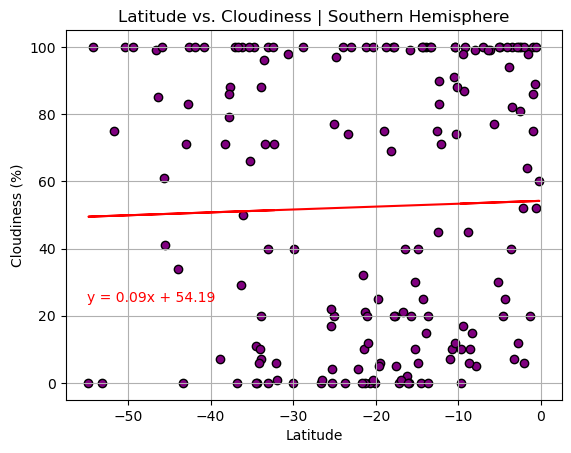

In [233]:
# Southern Hemisphere
# using the previously define linear regression function
regress_values, line_eq = linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])

# create scatter plot with this data
plt.scatter(
    southern_hemi_df['Lat'],
    southern_hemi_df['Cloudiness'],
    c='purple',
    edgecolors='black',
)

# Incorporate the other graph properties
# change the label of the axes so it is readable and not abbreviated
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Latitude vs. Cloudiness | Southern Hemisphere')
plt.plot(southern_hemi_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-55,24),fontsize=10,color="red")
plt.grid(True) 

# Save the figure
plt.savefig("output_data/Fig10.png")

# Show plot
plt.show()

# Discussion about the linear relationship of Latitude vs. Cloudiness

### Northern Hemisphere
> - There is an extremely weak positive correlation (indicated with a slope of 0.09) meaning that as the latitude increases (moving closer to the North pole) the cloudiness increases at a very small rate
> - The equation of y = 0.09x + 57.19 indicates that with each decrease in latitude by 1 degree, the cloudiness goes up by 0.09 percent.  And, 54.19 indcates the estimated cloudiness percentage at 0 latitude (the equator) based on these trends.
> - The r-value of 0..09 signifies that the positive correlation is almost non-existant.  This means that increasing latitude hardly affects the cloudiness percentage at all.  

### Southern Hemisphere
> - There is a positive correlation (indicated with a slope of 0.09) meaning that as the latitude increases (moving closer to the equator) the cloudiness increases at a very small rate
> - The equation of y = 0.09x + 54.19 indicates that with each increase in latitude by 1 degree, the cloudiness goes up by 0.09 percent.  And, 54.19 indcates the estimated humidity percentage at 0 latitude (the equator) based on these trends.
> - The r-value of 0.03 signifies that the positive correlation is almost non-exsitant.   This means that the positive correlation between cloudiness and latitude in the Southern Hemisphere is even weaker than the already-weak Northern Hemisphere and other factors play an almost total role in this relationship


### Wind Speed vs. Latitude Linear Regression Plot


The slope of the regression is: 0.03131033592509835.
The inercept of the regression is: 7.391580481303931.
The rvalue of the regression is: 0.09319311825579855.
The pvalue of the regression is: 0.07699763736598289.
The Standard Deviation is: 6.782892881639882.
The Standard Error is: 0.017654788025974043.
The Standard Error of the mean is: 0.3574898438487491.
The regression line equation is: y = 0.03x + 7.39.



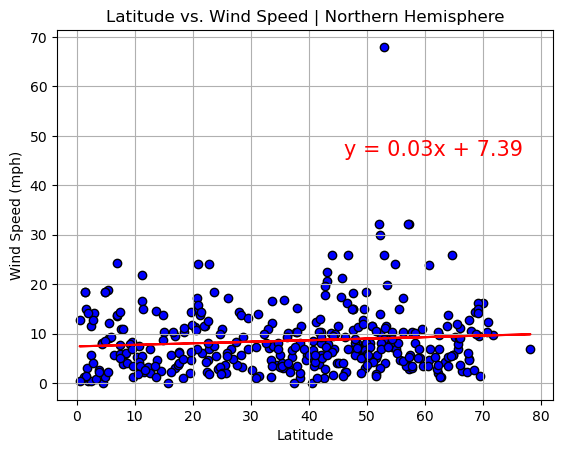

In [237]:
# Northern Hemisphere
# using the previously define linear regression function
regress_values, line_eq = linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])

# create scatter plot with this data
plt.scatter(
    northern_hemi_df['Lat'],
    northern_hemi_df['Wind Speed'],
    c='blue',
    edgecolors='black',
)

# Incorporate the other graph properties
# change the label of the axes so it is readable and not abbreviated
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Latitude vs. Wind Speed | Northern Hemisphere')
plt.plot(northern_hemi_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(46,46),fontsize=15,color="red")
plt.grid(True) 

# Save the figure
plt.savefig("output_data/Fig11.png")

# Show plot
plt.show()


The slope of the regression is: -0.11459471235563097.
The inercept of the regression is: 6.93855946780562.
The rvalue of the regression is: -0.2843112898695924.
The pvalue of the regression is: 0.00016412803629592613.
The Standard Deviation is: 5.653654725702997.
The Standard Error is: 0.02972517048645986.
The Standard Error of the mean is: 0.4336155233645682.
The regression line equation is: y = -0.11x + 6.94.



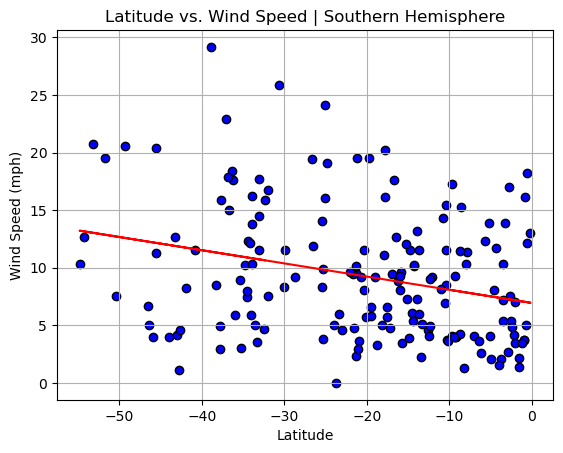

In [239]:
# Southern Hemisphere
# using the previously define linear regression function
regress_values, line_eq = linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])

# create scatter plot with this data
plt.scatter(
    southern_hemi_df['Lat'],
    southern_hemi_df['Wind Speed'],
    c='blue',
    edgecolors='black',
)

# Incorporate the other graph properties
# change the label of the axes so it is readable and not abbreviated
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Latitude vs. Wind Speed | Southern Hemisphere')
plt.plot(southern_hemi_df["Lat"],regress_values,"r-")
plt.annotate(line_eq,(46,46),fontsize=15,color="red")
plt.grid(True) 

# Save the figure
plt.savefig("output_data/Fig12.png")

# Show plot
plt.show()

# Discussion about the linear relationship of Latitude vs. Wind Speed

### Northern Hemisphere
> - There is an extremely weak positive correlation (indicated with a slope of 0.09) meaning that as the latitude increases (moving closer to the North pole) the wind speed increases at a very small rate
> - The equation of y = 0.03x + 7.39 indicates that with each decrease in latitude by 1 degree, the wind speed goes up by 0.03 miles per hour.  And, 7.39 indcates the estimated wind speed at 0 latitude (the equator) based on these trends.
> - The r-value of 0.09 signifies that the positive correlation is almost non-existant.  This means that increasing latitude hardly affects the wind speed at all.  

### Southern Hemisphere
> - There is a negative correlation (indicated with a slope of -0.11) meaning that as the latitude increases (moving closer to the equator) the wind speed decreases at a small rate
> - The equation of y = -0.11x + 6.94 indicates that with each increase in latitude by 1 degree, the wind speed goes down -0.11 miles per hour.  And, 6.94 indcates the estimated wind speed at 0 latitude (the equator) based on these trends.
> - The r-value of-0.28 signifies that the negative correlation is small but present.   This means that the negative correlation between wind speed and latitude in the Southern Hemisphere is slightly stronger than the Northern Hemisphere but other factors still play a very large total role in this relationship